In [1]:
from obspy import UTCDateTime,Trace
import matplotlib.pyplot as plt 
import pickle, os ,glob
import numpy as np
from obspy.taup import TauPyModel

In [7]:
class Meta(object):
    def __init__(self,time,baz=0):
        self.time = UTCDateTime(time)
        self.baz = int(baz)
        self.lon = 0
        self.lat = 0
        self.dep = 100
        self.mag = 7.0
        self.epi_dist = 120*111
        self.gac = 120
        self.az = 360-int(baz)
        self.ttime = ttime
        self.slow = 0.04
        self.inc = 0
        self.phase = 'SKS'
        self.accept = True
        self.snrq = 10.0
        self.snrt = 5.0
        self.maxdt = 4.0
        self.ddt = 0.1
        self.dphi = 1
        self.align = 'LQT'
        self.rotated = False
        self.CpH = None
        self.fmin=0.05
        self.fmax=0.125
        
def init_pmotion(ax,title):
#     ax.clear()
    ax.set_ylim((-1.2, 1.2))
    ax.set_xlim((-1.2, 1.2))
    ax.set_yticks(())
    ax.set_xticks(())

    ax.set_xlabel(r'W $\longleftrightarrow$ E')
    ax.set_ylabel(r'S $\longleftrightarrow$ N')

    return ax

In [3]:
baz300 = 'baz_300'
meta = pickle.load(open(f'{baz300}/Meta_data.pkl', "rb"))
LQT = pickle.load(open(f'{baz300}/LQT_data.pkl', "rb"))
ZNE = pickle.load(open(f'{baz300}/ZNE_data.pkl', "rb"))

In [4]:
ZNE

3 Trace(s) in Stream:
XX.MOD..HHE | 2022-03-04T15:36:47.811536Z - 2022-03-04T15:39:47.761536Z | 20.0 Hz, 3600 samples
XX.MOD..HHN | 2022-03-04T15:36:47.811398Z - 2022-03-04T15:39:47.761398Z | 20.0 Hz, 3600 samples
XX.MOD..HHZ | 2022-03-04T15:36:47.811676Z - 2022-03-04T15:39:47.761676Z | 20.0 Hz, 3600 samples

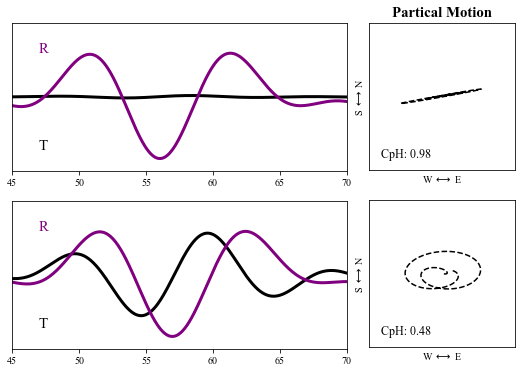

In [21]:
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,6))

baz300 = 'baz_300'
meta = pickle.load(open(f'{baz300}/Meta_data.pkl', "rb"))
LQT = pickle.load(open(f'{baz300}/LQT_data.pkl', "rb"))
ZNE = pickle.load(open(f'{baz300}/ZNE_data.pkl', "rb"))
ZNE = ZNE.slice(starttime=meta.time+meta.ttime-10,endtime=meta.time+meta.ttime+15)
ZNE.filter('bandpass', freqmin=0.05, freqmax=0.125, zerophase=True, corners=4)
#==========================

timebegin = meta.ttime-10
timeend = meta.ttime+15
pmax = max(max(abs(LQT[1].data)), max(abs(LQT[2].data)))

plt.subplot(212)
plt.plot(LQT[0].times(), LQT[0].data/pmax,'black',lw=3)
plt.plot(LQT[0].times(), LQT[1].data/pmax,'purple',lw=3)
plt.xlim(timebegin,timeend)
plt.ylim(-1.2,1.2)
plt.yticks([])
plt.text(x=meta.ttime-8,y=0.9,s='R',c='purple',fontsize=15, ha='left',va='top')
plt.text(x=meta.ttime-8,y=-0.9,s='T',c='k',fontsize=15, ha='left',va='bottom')

axp1 = fig.add_axes([0.95, 0.13,  0.34, 0.34])
axp1 = init_pmotion(ax=axp1,title ='Partical Motion')
axp1.plot(ZNE[0].data/pmax, ZNE[1].data/pmax, 'k--')
axp1.text(x=-1.0,y=-1.0,s=f'CpH: {meta.CpH}',fontsize=12)
#=======================================
baz80  = 'baz_80'
meta = pickle.load(open(f'{baz80}/Meta_data.pkl', "rb"))
LQT = pickle.load(open(f'{baz80}/LQT_data.pkl', "rb"))
ZNE = pickle.load(open(f'{baz80}/ZNE_data.pkl', "rb"))
ZNE = ZNE.slice(starttime=meta.time+meta.ttime-10,endtime=meta.time+meta.ttime+15)
ZNE.filter('bandpass', freqmin=0.05, freqmax=0.125, zerophase=True, corners=4)
#==========================
pmax = max(max(abs(LQT[1].data)), max(abs(LQT[2].data)))
plt.subplot(211)
plt.plot(LQT[0].times(), LQT[0].data/pmax,'black',lw=3)
plt.plot(LQT[0].times(), LQT[1].data/pmax,'purple',lw=3)
plt.xlim(timebegin,timeend)
plt.ylim(-1.2,1.2)
plt.yticks([])
plt.text(x=meta.ttime-8,y=0.9,s='R',c='purple',fontsize=15, ha='left',va='top')
plt.text(x=meta.ttime-8,y=-0.9,s='T',c='k',fontsize=15, ha='left',va='bottom')


axp2 = fig.add_axes([0.95, 0.54,  0.34, 0.34])
axp2 = init_pmotion(ax=axp2, title ='Partical Motion')
axp2.set_title('Partical Motion', fontsize=15, weight='bold')
axp2.plot(ZNE[0].data/pmax, ZNE[1].data/pmax, 'k--')
axp2.text(x=-1.0,y=-1.0,s=f'CpH: {meta.CpH}',fontsize=12)


plt.savefig('Iso_Ani_compare_with_PM.png',dpi=200 ,bbox_inches='tight' )
plt.savefig('Iso_Ani_compare_with_PM.pdf',bbox_inches='tight' )

In [18]:
meta.time


2022-03-04T15:36:47.000000Z

In [ ]:
timeend

In [ ]:
meta.__dir__()

In [ ]:
baz80  = 'baz_80'
meta = pickle.load(open(f'{baz300}/Meta_data.pkl', "rb"))
ZNE = pickle.load(open(f'{baz300}/ZNE_data.pkl', "rb"))